In order to successfully complete this assignment we recommend that you participate both individually and in groups during class. **Turn in your assignment using D2L no later than 11:59pm on the day of class.** Grading is based on correctness and completion.

# 13 In-Class Assignment: Projections

<img alt="Graph showing how one vector can be projected onto another vector by forming a right triangle" src="https://upload.wikimedia.org/wikipedia/commons/9/98/Projection_and_rejection.png" width="50%">

Image from: https://en.wikipedia.org/wiki/Vector_projection



### Agenda for today's class (80 minutes)

1. [(20 minutes) Pre-Class Review](#Quiz_4_Review)
1. [(30 minutes) Understanding Projections with Code](#Understanding_Projections_with_Code)
1. [(30 minutes) Gram-Schmidt Orthogonalization Process](#Gram-Schmidt_Orthogonalization_Process)


---
<a name="Quiz_4_Review"></a>
## 1. Pre-class Review

* [13--Projections_pre-class-assignment](13--Projections_pre-class-assignment.ipynb)

----
<a name="Understanding_Projections_with_Code"></a>
## 2. Understanding Projections With Code

In this in-class assignment, we are going to avoid some of the more advanced libraries ((i.e. no ```numpy``` or ```scipy``` or ```sympy```) to try to get a better understanding of what is going on in the math. 
The following code implements some common linear algebra functions:

In [1]:
#Standard Python Libraries only
import math
import copy

In [2]:
def dot(u,v):
    '''Calculate the dot product between vectors u and v'''
    if len(u) != len(v):
        print("ERROR -  dimensions not equal")
    else:
        temp = 0;
        for i in range(len(u)):
            temp += u[i]*v[i]
        return temp

In [3]:
def multiply(m1,m2):
    '''Calculate the matrix multiplication between m1 and m2 represented as list-of-list.'''
    n = len(m1)
    d = len(m2)
    m = len(m2[0])
    
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    else:
        result = [[0 for i in range(n)] for j in range(m)]
        for i in range(0,n):
            for j in range(0,m):
                for k in range(0,d):
                    result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
        return result

In [4]:
def add_vectors(v1,v2):
    v3 = []
    for i in range(len(v1)):
        v3.append(v1[i]+v2[i])
    return v3

In [5]:
def sub_vectors(v1,v2):
    v3 = []
    for i in range(len(v1)):
        v3.append(v1[i]-v2[i])
    return v3

In [6]:
def norm(u):
    '''Calculate the norm of vector u'''
    nm = 0
    for i in range(len(u)):
        nm += u[i]*u[i]
    return math.sqrt(nm)

In [7]:
def transpose(A):
    '''Calculate the transpose of matrix A represented as list of lists'''
    n = len(A)
    m = len(A[0])
    AT = list()
    for j in range(0,m):    
        temp = list()
        for i in range(0,n):
            temp.append(A[i][j])
        AT.append(temp)
    return AT

### Projection function

&#9989; **<font color=red>DO THIS:</font>** Write a function that projects vector $v$ onto vector $u$. 
Do not use the numpy library. 
Instead, use the functions provided above:

$$\mbox{proj}_u v = \frac{v \cdot u}{u \cdot u} u$$

Make sure this function will work for any size of $v$ and $u$. 

In [8]:
def proj(v,u):
    ## Put your code here
    vu = dot(v,u)
    uu = dot(u,u)
    div = vu/uu
    pv = []
    for i in range(len(u)):
        a = div * u[i]
        pv.append(a)
    return pv

Let's test your function. Below are two example vectors. Find the projection of v onto u. Note that the order of variables in your function `proj(.,.)` matters! Make sure you get the correct answers. 
You may want to test this code with more than one set of vectors. 

In [9]:
u = [1,2,0,3]
v = [4,0,5,8]
print(proj(v,u))

[2.0, 4.0, 0.0, 6.0]


In [10]:
from answercheck import checkanswer

checkanswer.vector(proj(v,u),'b400dee73da5b8fa07602efd89f20ac1');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[2. 4. 0. 6.]]
Answer seems to be correct



### Visualizing projections

&#9989; **<font color=red>DO THIS:</font>** See if you can design and implement a small function that takes two vectors ($a$ and $b$) as inputs and generates a figure similar to the one above.


I.e. a black line from the origin to "$b$", a black line from the origin to "$a$"; a green line showing the "$a$" component in the "$b$" direction and a red line showing the "$a$" component orthogonal to the green line. 
Also see the section titled "Projection of One Vector onto Another Vector" in Section 4.6 on page 258 of the book.

When complete, show your solution to the instructor.

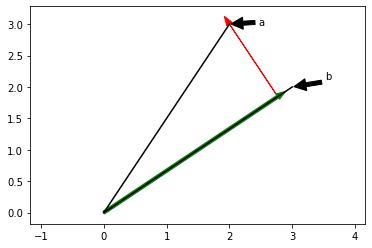

In [11]:
%matplotlib inline
import matplotlib.pylab as plt

b = [3,2]
a = [2,3]

def show_projection(a,b):
    plt.plot([0,a[0]], [0,a[1]], color='black')
    plt.annotate('b', b, 
            xytext=(0.9, 0.7), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
    plt.annotate('a', a, 
            xytext=(0.7, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
    plt.plot([0,b[0]], [0,b[1]], color='black')
    
#Finish your code here
    p = proj(a,b)
    plt.arrow(p[0],p[1], a[0]-p[0], a[1]-p[1],head_width = 0.1, color="red")
    plt.arrow(0,0, p[0], p[1], head_width = 0.1, width = 0.05,color="green")
    plt.axis('equal')
    
x = show_projection(a,b) ;

----

<a name="Gram-Schmidt_Orthogonalization_Process"></a>

## 3. Gram-Schmidt Orthogonalization Process

&#9989; **<font color=red>DO THIS:</font>** Implement the Gram-Schmidt orthogonalization process from the [Hefron](http://joshua.smcvt.edu/linearalgebra/book.pdf) textbook (page 282). 
This function takes a $m \times n$ Matrix $A$ with linearly independent columns as input and return a $m \times n$ Matrix $G$ with orthogonal column vectors. 
The basic algorithm works as follows:

- ```AT = transpose(A)``` (this process works with the columns of the matrix so it is easier to work with the transpose. Think about a list of list, it is easy to get a row (a list)).  
- Make a new empty list of the same size as ```AT``` and call it ```GT``` (G transpose)
- Loop index ```i``` over all of the rows in AT (i.e. columns of A) 

    - ```GT[i] = AT[i]```
    - Loop index ```j``` from 0 to ```i```
        - ```GT[i] -= proj(GT[i], GT[j])```
        
        
- ```G = transpose(GT)```

Use the following function definition as a template:

In [12]:
import numpy as np

In [13]:
def proj(a,b):
    pv = (np.dot(a, b) / np.dot(b, b)) * b
    return pv

In [14]:
def GramSchmidt(A):
    AT = np.array(A).T
    AT_len = len(AT)
    GT = [None] * AT_len
    for i in range(len(AT)):
        GT[i] = AT[i]
        for j in range(0,i):
            GT[i] = GT[i] - proj(GT[i],GT[j])
    G = np.array(GT).T
    return G

Here, we are going to test your function using the vectors:

In [15]:
A4 = [[1,4,8],[2,0,1],[0,5,5],[3,8,6]]
print(transpose(A4))
G4 = GramSchmidt(A4)
print(transpose(G4))

[[1, 2, 0, 3], [4, 0, 5, 8], [8, 1, 5, 6]]
[[1.0, 2.0, 0.0, 3.0], [2.0, -4.0, 5.0, 2.0], [4.0, 1.0, 0.0, -2.0]]


In [16]:
from answercheck import checkanswer

checkanswer.matrix(G4,'a472a81eef411c0df03ae9a072dfa040');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.  2.  4.]
 [ 2. -4.  1.]
 [ 0.  5.  0.]
 [ 3.  2. -2.]]
Answer seems to be correct



In [17]:
A2 = [[-4,-6],[3,5]]
print(transpose(A2))
G2 = GramSchmidt(A2)
print(transpose(G2))

[[-4, 3], [-6, 5]]
[[-4.0, 3.0], [0.2400000000000002, 0.3200000000000003]]


In [18]:
from answercheck import checkanswer

checkanswer.matrix(G2,'23b9860b72dbe5b84d7c598c08af9688');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.

Testing [[-4.    0.24]
 [ 3.    0.32]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION:</font>** What is the Big-O complexity of the Gram-Schmidt process? 

The complexity will be $O(n^3)$

----

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.


### Congratulations, we're done!

